In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

%matplotlib inline

# markdown and write-up is at the end of the file.

In [2]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [3]:
# Sorting employees by those who left and those who remained with the company
attrition = employees.loc[lambda df: employees['Attrition'] == 'Yes', :]
remain = employees.loc[lambda df: employees['Attrition'] == 'No', :]

# Selecting out employees by department
researchers = employees.loc[lambda df: employees['Department'] == 'Research & Development', :]
sales = employees.loc[lambda df: employees['Department'] == 'Sales', :]
hr = employees.loc[lambda df: employees['Department'] == 'Human Resources', :]

# Picking out the members of each department who left...
researchers_attrition = researchers.loc[lambda df: researchers['Attrition'] == 'Yes', :]
sales_attrition = sales.loc[lambda df: sales['Attrition'] == 'Yes', :]
hr_attrition = hr.loc[lambda df: hr['Attrition'] == 'Yes', :]

# ... and the members of each department who didn't leave
researchers_remain = researchers.loc[lambda df: researchers['Attrition'] == 'No', :]
sales_remain = sales.loc[lambda df: sales['Attrition'] == 'No', :]
hr_remain = hr.loc[lambda df: hr['Attrition'] == 'No', :]

# breaking down how many people fit into each department, and how many of those left vs remained
researchers_remain_count = researchers_remain.shape[0]
researchers_attrition_count = researchers_attrition.shape[0]
sales_remain_count = sales_remain.shape[0]
sales_attrition_count = sales_attrition.shape[0]
hr_remain_count = hr_remain.shape[0]
hr_attrition_count = hr_attrition.shape[0]
researchers_count = researchers.shape[0]
sales_count = sales.shape[0]
hr_count = hr.shape[0]



In [4]:
# breaking down the database by education/major
majors = pd.DataFrame(employees, columns=['EducationField'])
majors_count = pd.DataFrame(majors.EducationField.value_counts())
majors_count

# ... and by gender
gender = pd.DataFrame(employees, columns=['Gender'])
gender_count = pd.DataFrame(gender.Gender.value_counts())

# and by department
departments = pd.DataFrame(employees, columns=['Department'])
department_count = pd.DataFrame(departments.Department.value_counts())


In [5]:
# comparison of leavers-vs-remainers in how much they rated their job satisfaction
employees_jobsatisfaction = pd.DataFrame(employees.JobSatisfaction)
attrition_jobsatisfaction = pd.DataFrame(attrition.JobSatisfaction)
remain_jobsatisfaction = pd.DataFrame(remain.JobSatisfaction)

In [6]:
# comparison of departments' job satisfaction
research_jobsatisfaction = pd.DataFrame(researchers.JobSatisfaction)
sales_jobsatisfaction = pd.DataFrame(sales.JobSatisfaction)
hr_jobsatisfaction = pd.DataFrame(hr.JobSatisfaction)

In [7]:
# comparison of leavers-vs-remainers in the distance of their commute
employees_distance = pd.DataFrame(employees.DistanceFromHome)
attrition_distance = pd.DataFrame(attrition.DistanceFromHome)
remain_distance = pd.DataFrame(remain.DistanceFromHome)

In [8]:
# comparison of leavers-vs-remainers in how much monthly income they were earning
employees_monthly = pd.DataFrame(employees.MonthlyIncome)
attrition_monthly = pd.DataFrame(attrition.MonthlyIncome)
remain_monthly = pd.DataFrame(remain.MonthlyIncome)

In [9]:
# comparison of leavers-vs-remainers in how long their careers had been up til the point of measurement
employees_yearsworked = pd.DataFrame(employees.TotalWorkingYears)
attrition_yearsworked = pd.DataFrame(attrition.TotalWorkingYears)
remain_yearsworked = pd.DataFrame(remain.TotalWorkingYears)

In [10]:
# comparison of leavers-vs-remainers in how long they had worked at IBM
employees_yearsatibm = pd.DataFrame(employees.YearsAtCompany)
attrition_yearsatibm = pd.DataFrame(attrition.YearsAtCompany)
remain_yearsatibm = pd.DataFrame(remain.YearsAtCompany)

In [11]:
# comparison of leavers-vs-remainers in how long it had been since their last promotion
employees_sincepromo = pd.DataFrame(employees.YearsSinceLastPromotion)
attrition_sincepromo = pd.DataFrame(attrition.YearsSinceLastPromotion)
remain_sincepromo = pd.DataFrame(remain.YearsSinceLastPromotion)

In [12]:
# comparison of men vs women in how many years since their last promotion
female_employees = employees.loc[lambda df: employees['Gender'] == 'Female', :]
male_employees = employees.loc[lambda df: employees['Gender'] == 'Male', :]

women_timesincepromo = pd.DataFrame(female_employees.YearsSinceLastPromotion)
men_timesincepromo = pd.DataFrame(male_employees.YearsSinceLastPromotion)

# An analysis of employee data from IBM

The database covers a wide variety of measures of IBM’s employees.  Unfortunately, the context of the database was lacking, as it only includes a number of employees who left the company at some point; thus it’s impossible to tell whether this attrition rate was over the course of a month, a year, or a decade.  

*However*, even though the lack of context makes any conclusions about IBM’s employee turnover impossible, there are a number of interesting things that can still be gleaned from the data.

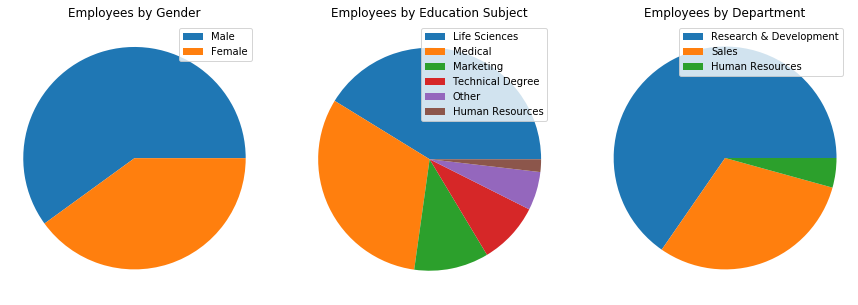

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(gender_count)
plt.axis('equal')
plt.title('Employees by Gender')
plt.legend(gender_count.index)
plt.subplot(1, 3, 2)
plt.pie(majors_count)
plt.axis('equal')
plt.title('Employees by Education Subject')
plt.legend(majors_count.index)
plt.subplot(1, 3, 3)
plt.pie(department_count)
plt.axis('equal')
plt.title('Employees by Department')
plt.legend(department_count.index)
plt.show()

This is a basic overview of some of the notable proportions within the employee population.  A slim majority of employees are male, almost three quarters got their degrees in either the life sciences or medical school, and the R&D department is huge compared to the Sales and HR departments.  

## Overarching question: What could have contributed to attrition?
When looking at a population without any kind of context or knowledge of past trends, there are quite a few reasons why people could be leaving.  Unhappiness with their job, low pay, too long between promotions, an excessively long commute, and many other factors can contribute to a person’s leaving their employer.  How much of an influence they have is much harder to pin down, but comparing the differences between the population who chose to leave and those who remained with the company should at least point us in a useful direction.

### Question 1: How much of an impact did job satisfaction have on attrition?
Job satisfaction is the first factor I chose to look at, given its likely correlation with someone’s decision to seek greener pastures.  Comparing the self-reported ratings of those who chose to leave with those who stayed at IBM, one finds a noticeable (and completely unsurprising) uptick in the proportion of employees who left and rated their job satisfaction as only ‘1’ (the lowest possible rating) alongside a similar drop in the proportion who rate their job satisfaction as ‘4’ (the highest possible rating).  A t-test confirms that the difference in the two populations is distinct and not simply an effect of random noise.


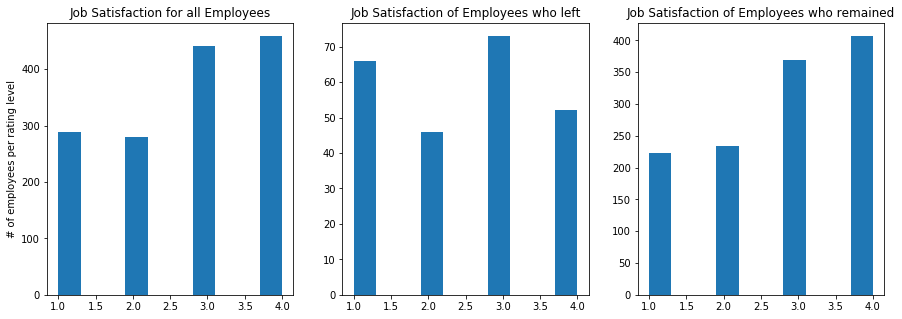

The t-test comparing the job satisfaction of those who stayed with the company and those who left the company resulted in t = 3.92611 and p = .0001052


In [14]:
# histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(employees_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction for all Employees')
plt.ylabel('# of employees per rating level')
plt.subplot(1, 3, 2)
plt.hist(attrition_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction of Employees who left')
plt.subplot(1, 3, 3)
plt.hist(remain_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction of Employees who remained')
plt.show()

# t-test
ttest_ind(remain_jobsatisfaction, attrition_jobsatisfaction, equal_var=False)

print('The t-test comparing the job satisfaction of those who stayed with the company and those who left the company resulted in t = 3.92611 and p = .0001052')

# p value is low enough to have confidence in this being a factor, 
# but not so low that it's a high degree of confidence.
# t value is high enought that it's likely *a* factor, 
# though maybe not as big a factor as one might expect

### Sidebar: job satisfaction between departments
Following up on job satisfaction as a subject, I was curious as to whether there was a discernable difference between the three departments, and it turns out that while R&D and Sales have job satisfaction numbers similar to the employee population as a whole, HR had a significantly higher proportion of employees who gave less-than-stellar job satisfaction ratings.  However, despite this, HR had a slightly *lower* rate of attrition than Sales.  Pinning down the reasons for this discrepancy between departments would be an interesting puzzle, and might even be possible with the data at hand, but is beyond the scope of this paper.

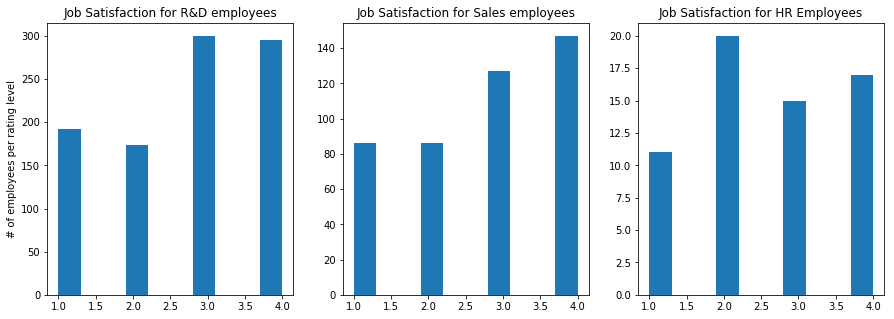

R&D attrition % = 0.1383975026014568
Sales attrition % = 0.2062780269058296
HR attrition % = 0.19047619047619047


In [15]:
# histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(research_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction for R&D employees')
plt.ylabel('# of employees per rating level')
plt.subplot(1, 3, 2)
plt.hist(sales_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction for Sales employees')
plt.subplot(1, 3, 3)
plt.hist(hr_jobsatisfaction['JobSatisfaction']) 
plt.title('Job Satisfaction for HR Employees')
plt.show()

print('R&D attrition % = ' + str(researchers_attrition_count/researchers_count))
print('Sales attrition % = ' + str(sales_attrition_count/sales_count))
print('HR attrition % = ' + str(hr_attrition_count/hr_count))

### Question 2: How much did commute distance impact decisions to leave?
The distance that people commute is a known factor in how likely they are to stay with a company.  How much did the population who left differ in this measure from those who stayed?

The answer is "somewhat, but not immensely."  The average commute distance was indeed higher for those who left, but not immensely so.  Further, the wide variance in both populations mean that the p-value for this comparison is too high to place great confidence in this measure as one of the deciding factors in whether people leave or stay.

The t-test comparing the commute distance of those who stayed with the company and those who left the company resulted in t = 2.888183 and p = .004137


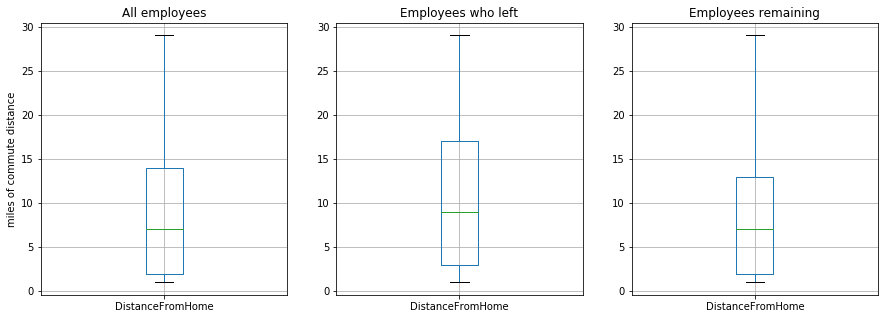

In [16]:
# box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
employees_distance.boxplot()
plt.title('All employees')
plt.ylabel('miles of commute distance')
plt.subplot(1, 3, 2)
attrition_distance.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_distance.boxplot()
plt.title('Employees remaining')

# t-test
ttest_ind(attrition_distance, remain_distance, equal_var=False)

print('The t-test comparing the commute distance of those who stayed with the company and those who left the company resulted in t = 2.888183 and p = .004137')

# p value is barely low enough to have confidence in this being a factor,
# and t value is sufficiently low that even if it did have an effect it was likely a small one

### Question 3: How much did lower income correlate with decisions to leave?
Income is one of the classic reasons why people leave one workplace for another.  How did the two sub-populations compare here?

 
While there is a large amount of variance and many extreme outliers in both populations, *on average* the people who left had noticeably lower incomes than those who stayed.  The t-test further underlines the difference between the two populations.  This isn’t exactly a surprising conclusion, and it’s complicated by other factors that I’ll get into below, but it’s a worthwhile point to make in this discussion.


The t-test comparing the incomes of those who stayed with the company and those who left the company resulted in t = 7.482622 and p = 4.433589e-13


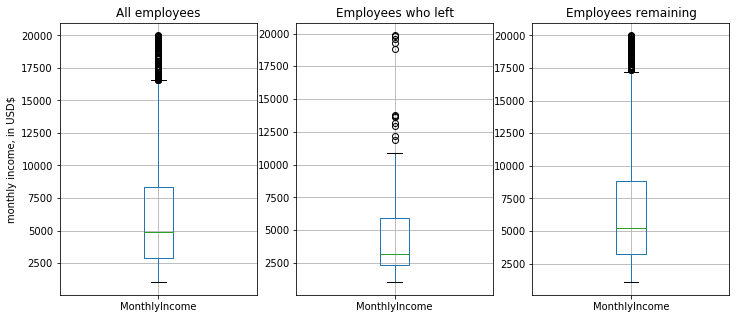

In [17]:
# box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_monthly.boxplot()
plt.title('All employees')
plt.ylabel('monthly income, in USD$')
plt.subplot(1, 3, 2)
attrition_monthly.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_monthly.boxplot()
plt.title('Employees remaining')

# t-test
ttest_ind(remain_monthly, attrition_monthly, equal_var=False)

print('The t-test comparing the incomes of those who stayed with the company and those who left the company resulted in t = 7.482622 and p = 4.433589e-13')

# t value is non-negligible and p value is very low, lending high confidence to this being a factor in attrition

### Question 4: Career length's impact on attrition
One question that a lot of HR experts are asking these days is whether age has an impact on how often someone switches between jobs.  The reasons for the (possible) shift in behavior patterns are immaterial for this paper, but the fact remains that it’s a point of curiosity for many, so it’s worth looking into: How much *did* a person's total career length have to do with their likelihood to leave the company?

The data displayed below show that there is a distinct difference in length of career (again, on average) between those who stayed at IBM and those who left, with a t-test almost as conclusive as the one for income.  

This ties in with the relatively lower wages between those who left and those who stayed: the people who have worked more years tend to have higher salaries, and so if there’s a difference in length of careers then that almost certainly has an impact on the disparity of average income between the two populations.  We need to be very careful in not drawing direct causal relationships between these factors and peoples’ decisions to leave, as there are often multiple factors that impact those decisions, and not all of them are going to be direct.  Strong correlation is as much as we are likely to get, with this particular data set.


The t-test comparing the lifetime years worked of those who stayed with the company and those who left the company resulted in t = 7.019178 and p = 1.159817e-11


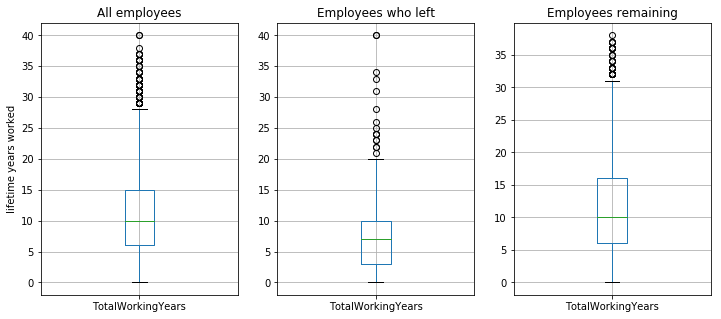

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_yearsworked.boxplot()
plt.title('All employees')
plt.ylabel('lifetime years worked')
plt.subplot(1, 3, 2)
attrition_yearsworked.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_yearsworked.boxplot()
plt.title('Employees remaining')

ttest_ind(remain_yearsworked, attrition_yearsworked, equal_var=False)
print('The t-test comparing the lifetime years worked of those who stayed with the company and those who left the company resulted in t = 7.019178 and p = 1.159817e-11')

# t value is non-negligible and p value is very low, 
# lending high confidence to this being a factor in attrition

### Question 5: Impact of years worked at IBM on attrition
“Company loyalty” is a known phenomena; people get used to the way things are done at a particular company, and become reluctant to leave.  How much of an effect did the length of time employees had been working at *IBM* have on their odds of leaving?
 
The comparison and t-test aren’t as conclusive here as in the two prior tests, but it is still  good enough to show a strong correlation between length of time spent working for IBM and the likelihood of someone staying with the company.  

(This, unfortunately, gets into hazy territory given the lack of timeline context for the database – because we don’t know how much time the database covers or how much total turnover there is every year, we can’t pin down exactly how important this correlation is.  With a better idea of how many new employees were entering or leaving the company per time period, we would be able to draw better conclusions about the importance that length of time working there had in people’s decisions to leave or stay.)


The t-test comparing the years worked at IBM of those who stayed with the company and those  who left the company resulted in t = 5.282596 and p = 2.285905e-7


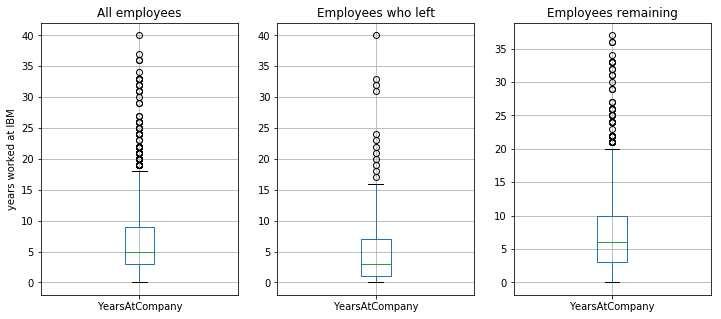

In [19]:
ttest_ind(remain_yearsatibm, attrition_yearsatibm, equal_var=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
employees_yearsatibm.boxplot()
plt.title('All employees')
plt.ylabel('years worked at IBM')
plt.subplot(1, 3, 2)
attrition_yearsatibm.boxplot()
plt.title('Employees who left')
plt.subplot(1, 3, 3)
remain_yearsatibm.boxplot()
plt.title('Employees remaining')

print('The t-test comparing the years worked at IBM of those who stayed with the company and those  who left the company resulted in t = 5.282596 and p = 2.285905e-7')

# p value is very low, lending high confidence to this being a factor in attrition

### Sidenote: The impact of promotions on decisions to leave
Possibility for advancement is another “obvious” reason why people choose to stay or leave a company, and the database has a metric that ostensibly works to measure that, by counting the years since an employee’s last promotion. 

However, this runs into the issue of human patience and the fact that we're measuring an up-or-out decision process.  Essentially, you can't get a good measurement of how much promotion had to do with decisions to leave if the time horizon for the average employee deciding to leave because of lack of promotion is at all similar to the time horizon for the average employee to get a promotion; the two signals will look identical in the data.  To double-check this hypothesis, a t-test of the "leave" and "stay" populations' time since last promotion shows that this measure does, in fact, have too high a p-value to base any conclusions on.



In [20]:
# t-test
ttest_ind(attrition_sincepromo, remain_sincepromo, equal_var=False)
print('The t-test comparing the years since their last promotion of those who stayed with the company and those  who left   resulted in t = 1.287927 and p = 0.198651')

# p is too high to put much faith in this comparison.

The t-test comparing the years since their last promotion of those who stayed with the company and those  who left   resulted in t = 1.287927 and p = 0.198651


### Conclusion

The first conclusion that needs to be discussed is that no solid conclusions can be easily made by this particular dataset - there's just too little time-related data and too little detail in the database to draw concrete causal links between any factor and attrition.  

With that being said, though, it's pretty apparent that the old dictum of supply and demand has a hand in whether or not people decide to leave; among all the factors I tested, pay was by far the most relevant to whether someone had left the company.  

Career length, being heavily connected to pay level, was likewise highly likely to have something to do with decisions to leave.  Similarly, the longer that someone spent working at IBM, the less likely they were to leave, on average, which (again) is likely tangled up with pay level, and thus can't be used as a definitive causal factor.

Job satisfaction, normally what one would think of as something that would heavily impact decisions about whether to stay with a job, had less correlation with leaving than one might expect, likely to do with people finding better opportunities elsewhere even though they weren't unhappy at IBM.  

All told, there are a number of strong *correlations* that decision-makers could use to help figure out moves to reduce attrition, but direct causation is still unclear.

#### PS: Gender’s impact on promotions
A random test I ran to see if there were anything else interesting in the database was to compare the difference in years since last promotion for men versus for women.  The results were inconclusive, at best, with a p value of over 0.3, but still suggestive from the box chart that there might be some degree of bias there.


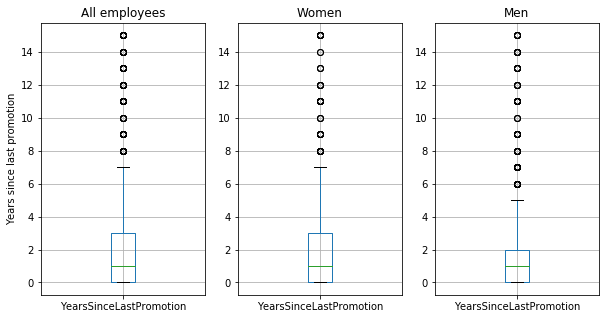

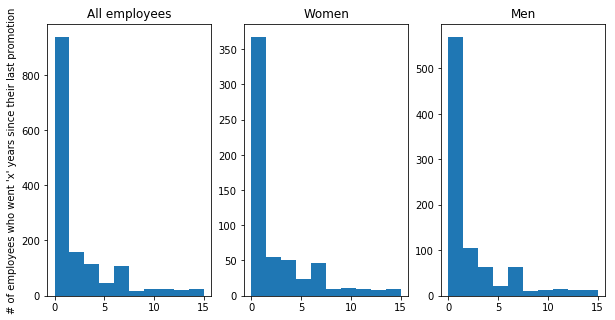

The t-test comparing the years since their last promotion of men versus women resulted in t = 1.0287927 and p = 0.303721


In [21]:
# box charts
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
employees_sincepromo.boxplot()
plt.title('All employees')
plt.ylabel('Years since last promotion')
plt.subplot(1, 3, 2)
women_timesincepromo.boxplot()
plt.title('Women')
plt.subplot(1, 3, 3)
men_timesincepromo.boxplot()
plt.title('Men')
plt.show()

# histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(employees['YearsSinceLastPromotion']) 
plt.title('All employees')
plt.ylabel('# of employees who went \'x\' years since their last promotion')
plt.subplot(1, 3, 2)
plt.hist(female_employees['YearsSinceLastPromotion']) 
plt.title('Women')
plt.subplot(1, 3, 3)
plt.hist(male_employees['YearsSinceLastPromotion']) 
plt.title('Men')
plt.show()

# t-test
ttest_ind(women_timesincepromo, men_timesincepromo, equal_var=False)
print('The t-test comparing the years since their last promotion of men versus women resulted in t = 1.0287927 and p = 0.303721')

# p is too high to put much faith in this comparison.